In [2]:
import numpy as np
from qiskit.circuit.library import RealAmplitudes

import qvm

/Users/nathanieltornow/qvm-projects/qvm/.venv/lib/python3.10/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


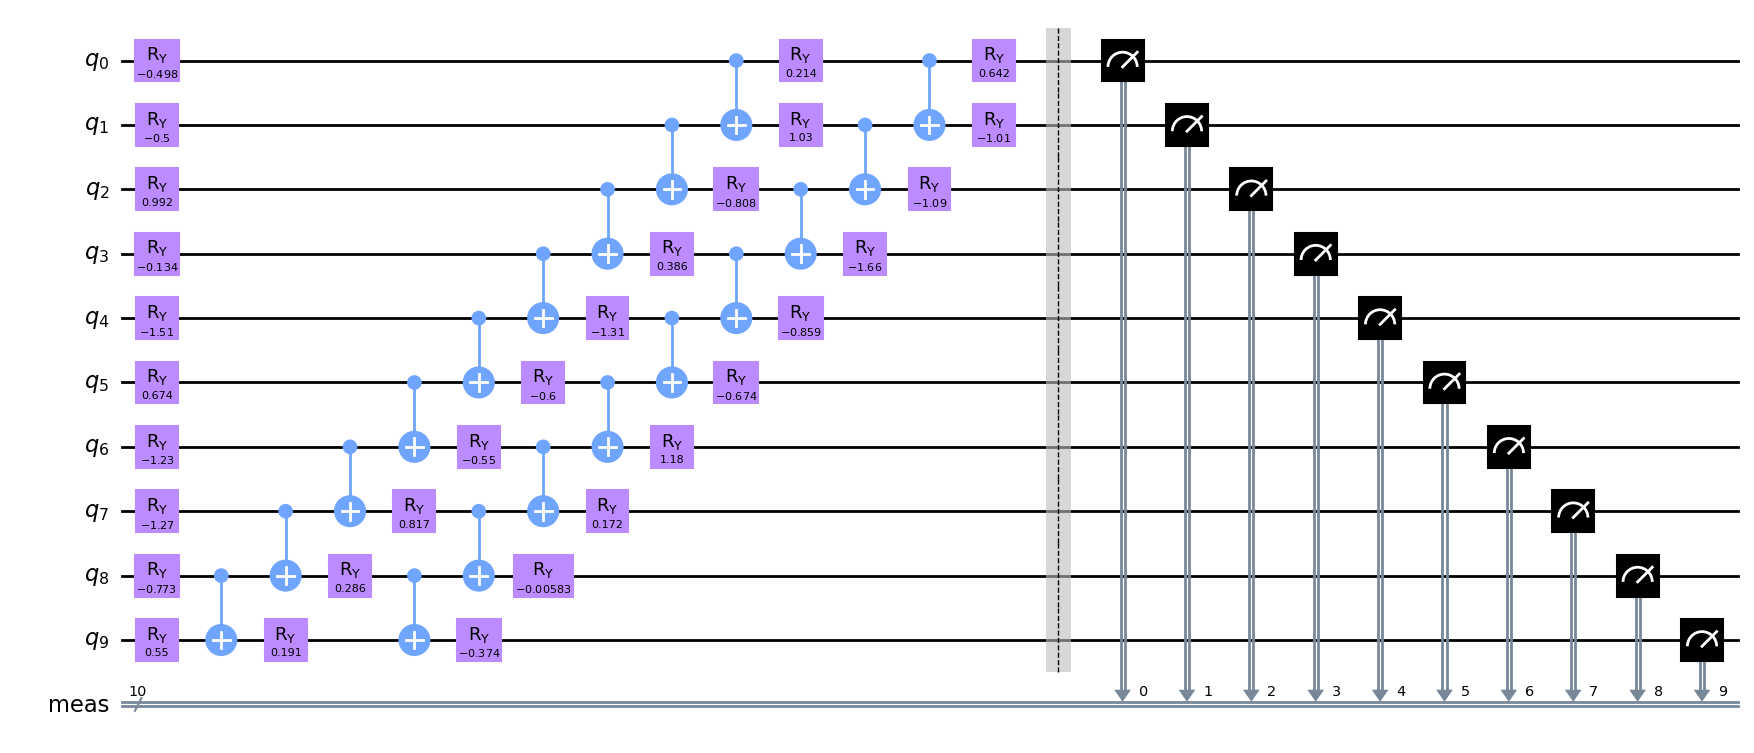

In [3]:
circuit = RealAmplitudes(10, reps=2).decompose()
circuit.measure_all()
circuit = circuit.assign_parameters({param: np.random.randn() for param in circuit.parameters})
circuit.draw(output="mpl", fold=-1)

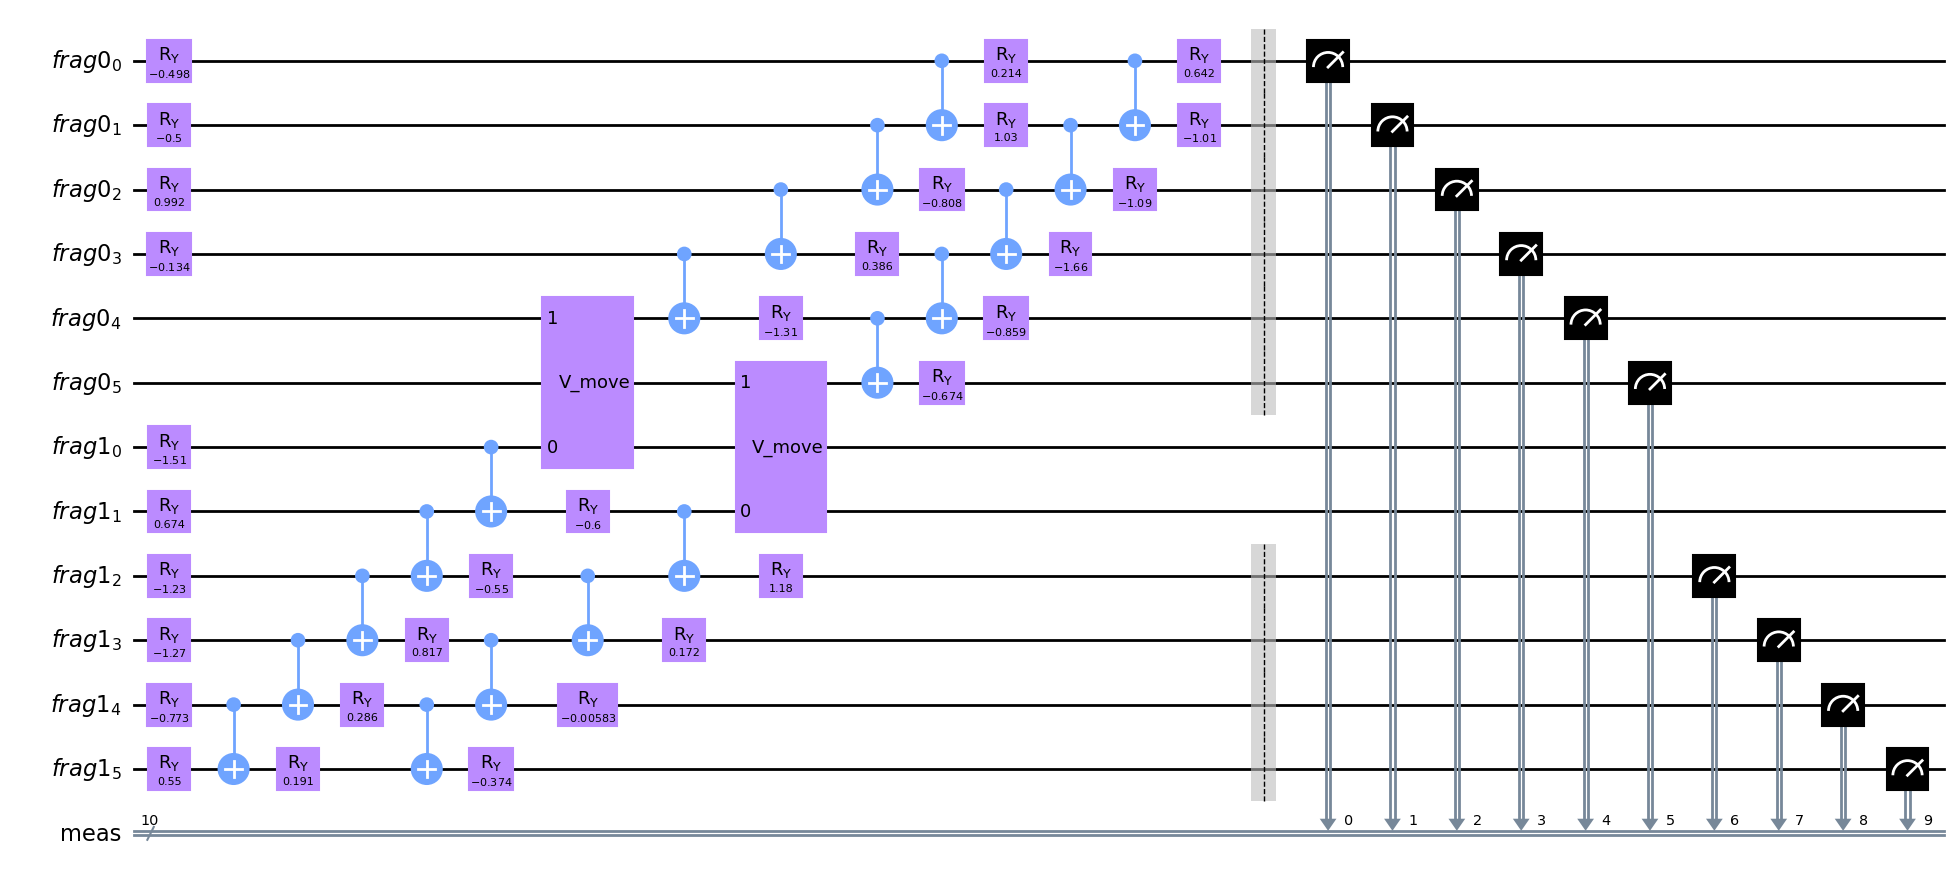

In [4]:
from qvm.cut import metis_cut_circuit


cut_circuit = metis_cut_circuit(circuit, num_fragments=2)
cut_circuit.draw(output='mpl', fold=-1)

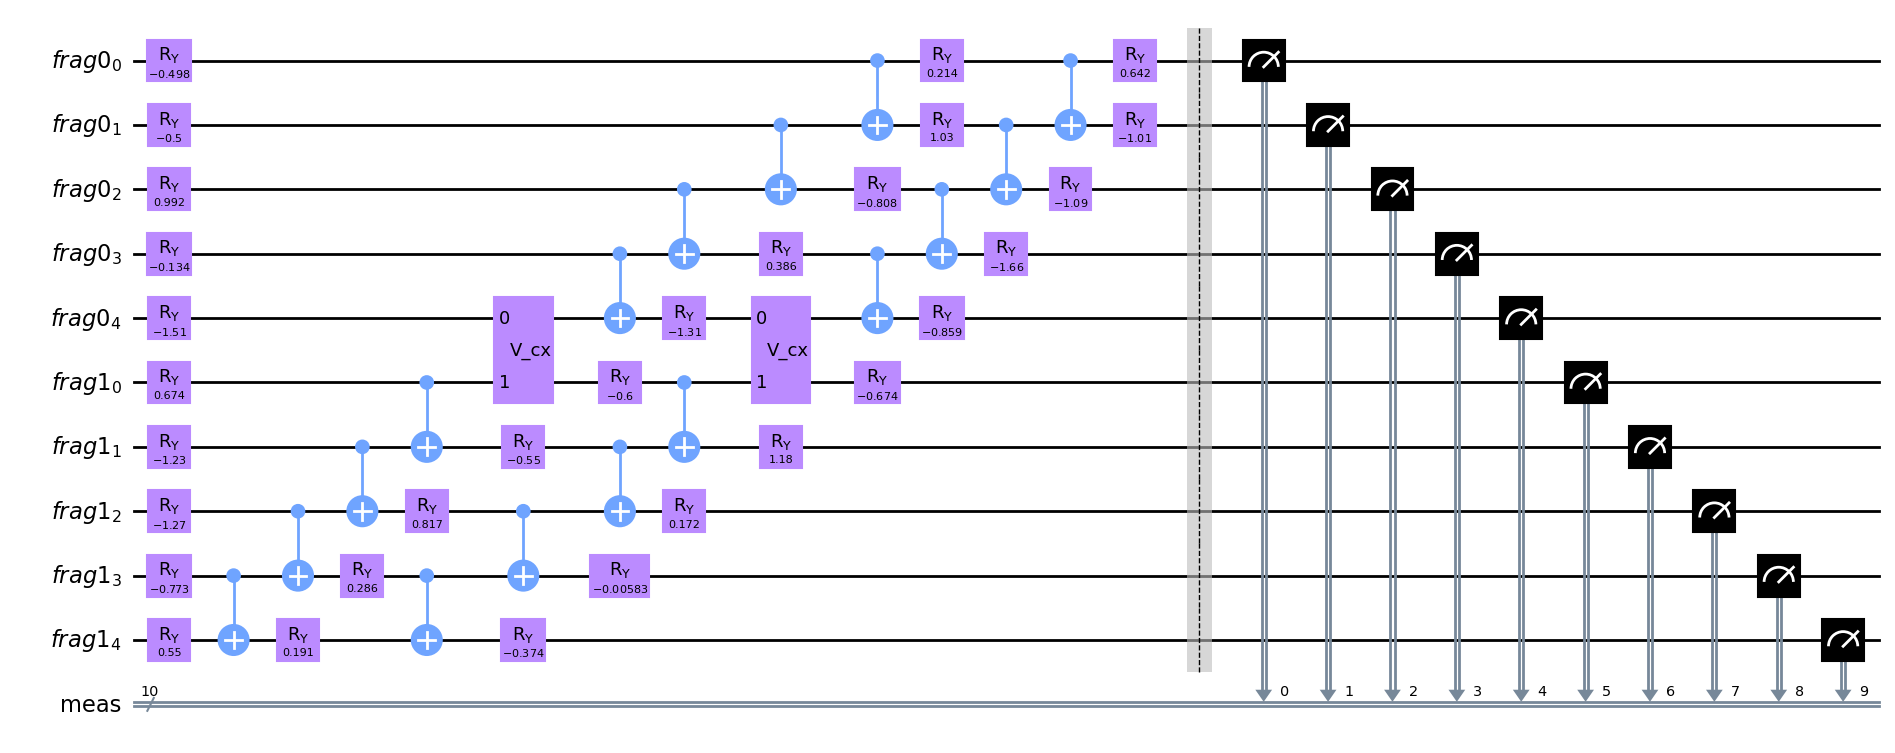

In [5]:
from qvm.cut import contraction_tree_cut_circuit
from qvm.cut.success_estimators import QPUSizeEstimator


cut_circuit = contraction_tree_cut_circuit(
    circuit, success_estimator=QPUSizeEstimator(max_qpu_size=5)
)
cut_circuit.draw(output='mpl', fold=-1)

In [6]:
vc = qvm.VirtualCircuit(cut_circuit)

for fragment in vc.fragments:
    print(fragment)

print(vc.virtual_gates)
print(vc.virtual_gate_infos)

QuantumRegister(5, 'frag0')
QuantumRegister(5, 'frag1')
[Instruction(name='v_cx', num_qubits=2, num_clbits=0, params=[]), Instruction(name='v_cx', num_qubits=2, num_clbits=0, params=[])]
[VirtualGateInfo(vgate=Instruction(name='v_cx', num_qubits=2, num_clbits=0, params=[]), frag1=QuantumRegister(5, 'frag0'), frag2=QuantumRegister(5, 'frag1'), frag1_index=0, frag2_index=0), VirtualGateInfo(vgate=Instruction(name='v_cx', num_qubits=2, num_clbits=0, params=[]), frag1=QuantumRegister(5, 'frag0'), frag2=QuantumRegister(5, 'frag1'), frag1_index=1, frag2_index=1)]


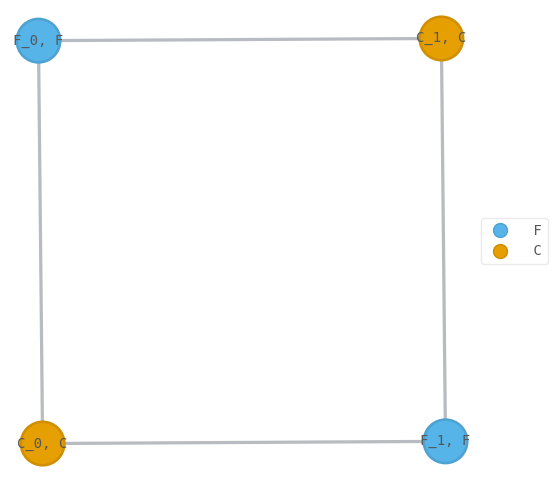

In [7]:
tn = qvm.build_dummy_tensornetwork(vc)
tn.draw(color=["F", "C"])

In [12]:
results = qvm.sample_virtual_circuit(vc, shots=100000)
tn = qvm.build_tensornetwork(vc, results)

tn.contract(all, optimize='auto-hq')

-0.06144687533378601

In [13]:
from qiskit_aer import AerSimulator

simulator = AerSimulator()
counts = simulator.run(circuit, shots=100000).result().get_counts()
print(qvm.expval_from_counts(counts))

-0.059779999999999965
